## Data Cleaning
#### In this Jupyter Notebook you will find the process of data cleaning of a car insurance company from the USA.

First, we will import the libraries that we will be using.

In [242]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [243]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Then, we will import the dataset that we will be working on.

In [244]:
car = pd.read_csv('../Data/AutoInsurance.csv')

We explore the dataset.

In [245]:
car.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [246]:
car.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Columns and explanation of columns:
- Customer: customer id
- State: State
- Customer Lifetime Value: total amount of money paid by client.
- Response: No information included
- Coverage: Type of insurance
- Education: Education level of the customer.
- Effective to Date: Date since when the insurance is active (They are usually activated in a yearly basis,if impayment it is not active)
- EmploymentStatus: Status of employment.
- Gender: Gender
- Income: Yearly income.
- Location Code:
- Marital Status: Married or not.
- Monthly Premium Auto: Amount paid in a monthly basis.
- Months since Last Claim: Months since last accident.
- Months Since Policy Inception: Months since activation of the insurance.
- Number of Open Complaints: Number of accidents still open.
- Number of Policies: Number of insurances hold by the same person
- Policy Type: Personal / Corporate
- Renew Offer Type: Next offer
- Sales Channel: Channel of sales of insurance.
- Total Claim Amount: Amount claimed by other insurances in car accident.
- Vehicle Class: Type of car.
- Vehicle Size: Size


In order to work better with data I will change some column names.

In [247]:
car.rename(columns = {'Customer Lifetime Value':'LTV', 'Effective To Date':'Expiration_date',\
                      'EmploymentStatus': 'Job_Status','Location Code':'Location',\
                      'Marital Status':'Civil_Status', 'Monthly Premium Auto':'Monthly_Price' ,\
                      'Months Since Last Claim': 'Months_LastClaim',\
                      'Months Since Policy Inception': 'Months_SinceActivation',\
                      'Number of Open Complaints':'Number_Open_Complaints',
                      'Number of Policies':'Number_Insurances',\
                      'Renew Offer Type':'Offer_Type_Renew', 'Sales Channel': 'Sales_Channel', \
                      'Total Claim Amount':'Total_Claim_Amount',\
                      'Vehicle Class':'Car_Type', 'Vehicle Size':'Car_Size'}, inplace = True)

In [248]:
car.columns

Index(['Customer', 'State', 'LTV', 'Response', 'Coverage', 'Education',
       'Expiration_date', 'Job_Status', 'Gender', 'Income', 'Location',
       'Civil_Status', 'Monthly_Price', 'Months_LastClaim',
       'Months_SinceActivation', 'Number_Open_Complaints', 'Number_Insurances',
       'Policy Type', 'Policy', 'Offer_Type_Renew', 'Sales_Channel',
       'Total_Claim_Amount', 'Car_Type', 'Car_Size'],
      dtype='object')

I decide to drop some columns since I will not be using them in this project.

In [249]:
car.drop(columns = ['Response', 'Policy', 'Offer_Type_Renew','LTV','Expiration_date'], inplace = True)

Now I'm going to check the type of the data we have and empty values.

In [250]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 19 columns):
Customer                  9134 non-null object
State                     9134 non-null object
Coverage                  9134 non-null object
Education                 9134 non-null object
Job_Status                9134 non-null object
Gender                    9134 non-null object
Income                    9134 non-null int64
Location                  9134 non-null object
Civil_Status              9134 non-null object
Monthly_Price             9134 non-null int64
Months_LastClaim          9134 non-null int64
Months_SinceActivation    9134 non-null int64
Number_Open_Complaints    9134 non-null int64
Number_Insurances         9134 non-null int64
Policy Type               9134 non-null object
Sales_Channel             9134 non-null object
Total_Claim_Amount        9134 non-null float64
Car_Type                  9134 non-null object
Car_Size                  9134 non-null object
dtype

No null values found and the data types are correct.


Let's check the describe function in order to see if there are anomalies in our data (Outliers detection).

In [251]:
car.describe()

,Income,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


We can see some strange numbers in LTV, Income, Total_Claim_Amount. Let's check in a boxplot, if there are outliers

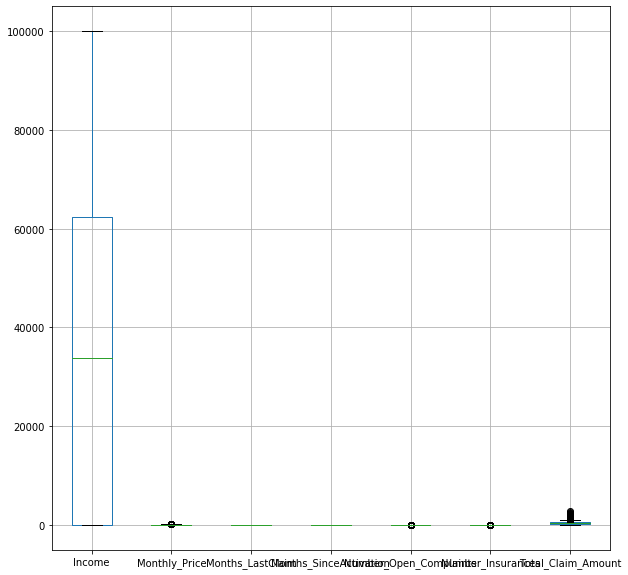

In [252]:
car.boxplot() #By looking at the boxplots, we can see that there might be some outliers.

###### Let's start looking at Income.
It seems that there might not be outliers, let's check it individually.

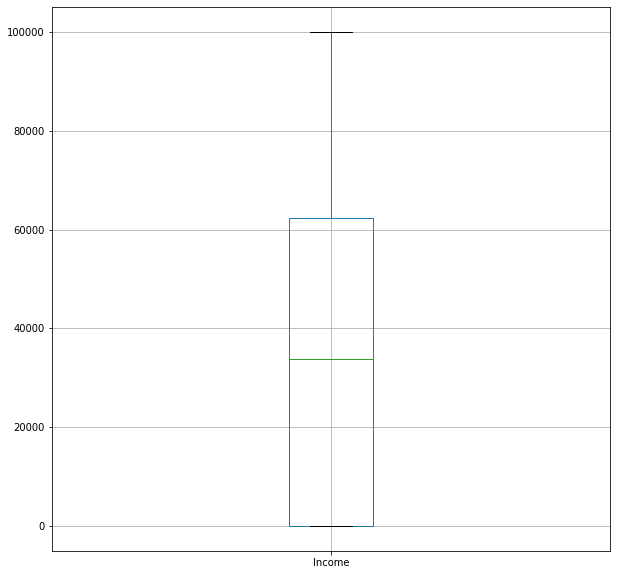

In [253]:
car.boxplot(column = 'Income') #As expected, no outliers

Even though there are no shown outliers in the Income column, there are some values at 0, which correspond to Unemployed customers (25%), as seen below.

In [254]:
car.groupby('Job_Status').min()['Income'] 

Job_Status
Disabled         10097
Employed         20009
Medical Leave    10037
Retired          10180
Unemployed           0
Name: Income, dtype: int64

In [255]:
#Checking the proportion of Unemployed. 
len(car.query('Income==0'))/len(car)

0.25366761550251804

###### Inside Monthly Price

Looking at the boxplot graph above, we can see that there are outliers. In order to check if they are outliers or not, we will apply the 3 times the Interquartile Range. So, if a value is far from 3 times the Interquartile Ranfe, it will be an outlier and depending on the proportion of outliers with respect to original dataframe, I will delete them.

In [256]:
q1,q3= np.quantile(car['Monthly_Price'],[0.25,0.75]) #q1 and q3 are the quantiles of column LTV

In [257]:
iqr = q3-q1 #interquartile range of ltv
lower = q1 - iqr*3 #Lower limit
upper = q3 + iqr*3 #Upper limit

Let's check the proportion of outliers:

In [258]:
len(car.query(f'Monthly_Price < {lower} | Monthly_Price > {upper}'))/len(car)

0.009415371140792644

0.9% of outliers with respect to the original dataframe so, we will delete them.

In [259]:
car.query(f'Monthly_Price < {lower} | Monthly_Price > {upper}')

,Customer,State,Coverage,Education,Job_Status,Gender,Income,Location,Civil_Status,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Policy Type,Sales_Channel,Total_Claim_Amount,Car_Type,Car_Size
31,UL64533,Nevada,Extended,High School or Below,Employed,M,65999,Urban,Married,237,1,14,0,6,Corporate Auto,Agent,615.927769,Luxury SUV,Medsize
196,AZ62651,Oregon,Premium,High School or Below,Employed,M,56855,Suburban,Single,255,12,1,0,1,Corporate Auto,Web,1836.000000,Luxury SUV,Medsize
248,FO35655,Oregon,Extended,Bachelor,Unemployed,M,0,Suburban,Single,245,34,83,0,1,Corporate Auto,Branch,2345.413441,Luxury SUV,Medsize
404,DJ91267,Nevada,Extended,Bachelor,Employed,F,34226,Rural,Married,244,29,22,0,2,Personal Auto,Agent,494.395024,Luxury SUV,Small
496,JC11405,Oregon,Premium,High School or Below,Employed,M,55687,Suburban,Divorced,276,33,91,0,1,Personal Auto,Agent,1324.800000,Luxury SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,FS38926,California,Extended,Bachelor,Employed,F,66022,Rural,Married,239,17,80,0,1,Personal Auto,Web,538.229502,Luxury Car,Medsize
8853,JY66887,California,Extended,High School or Below,Unemployed,F,0,Suburban,Single,247,5,12,3,5,Personal Auto,Branch,1778.400000,Luxury Car,Medsize
8911,QK82654,California,Premium,College,Unemployed,M,0,Suburban,Single,286,3,3,0,9,Personal Auto,Agent,2059.200000,Luxury SUV,Small
8943,FM12425,California,Extended,College,Employed,M,26488,Suburban,Divorced,247,21,39,0,7,Personal Auto,Web,1321.584957,Luxury SUV,Medsize


In [260]:
car.columns

Index(['Customer', 'State', 'Coverage', 'Education', 'Job_Status', 'Gender',
       'Income', 'Location', 'Civil_Status', 'Monthly_Price',
       'Months_LastClaim', 'Months_SinceActivation', 'Number_Open_Complaints',
       'Number_Insurances', 'Policy Type', 'Sales_Channel',
       'Total_Claim_Amount', 'Car_Type', 'Car_Size'],
      dtype='object')

In [ ]:
#Claim behaviour